# Clustring Analysis Using K-means Algorithm

Import necessary libraries: The code starts by importing libraries like numpy for numerical operations, matplotlib.pyplot for plotting, sklearn.datasets to load the digits dataset, sklearn.preprocessing for scaling the data, and sklearn.metrics to evaluate the clustering results.

Load and preprocess data: It loads the digits dataset, which is a collection of handwritten digits. The data is then scaled using scale() to standardize the features, which is often beneficial for clustering algorithms.
Define variables: Several variables are defined to store information about the dataset, such as the number of samples, features, and unique digits. labels stores the true labels of the digits. sample_size is used for the silhouette score calculation.

Define bench_k_means function: This function takes a clustering estimator (like KMeans), a name for the estimator, and the data as input. It fits the estimator to the data, measures the time taken for fitting, and then calculates and prints various clustering evaluation metrics:
Inertia: A measure of how internally coherent clusters are. Lower inertia is better.
Homogeneity Score: Measures if each cluster contains only data points belonging to a single class.

Completeness Score: Measures if all data points belonging to a given class are assigned to the same cluster.

V-measure Score: The harmonic mean of homogeneity and completeness.
Adjusted Rand Score (ARI): Measures the similarity between the true labels and the cluster assignments, adjusted for chance.

Adjusted Mutual Info Score (AMI): Similar to ARI, measures the agreement between the true labels and cluster assignments, adjusted for chance.

Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined clusters.





In [15]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn import metrics

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d,\t n_samples %d,\t n_features %d" % (n_digits, n_samples, n_features))
print(79 * '_')
print('%9s' % 'init', 'time', 'inertia', 'compl', 'v-meas', 'ARI', 'AMI', 'silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%9s' % name, '%.2fs' % (time() - t0), '%i' % estimator.inertia_,
          '%.3f' % metrics.homogeneity_score(labels, estimator.labels_),
          '%.3f' % metrics.completeness_score(labels, estimator.labels_),
          '%.3f' % metrics.v_measure_score(labels, estimator.labels_),
          '%.3f' % metrics.adjusted_rand_score(labels, estimator.labels_),
          '%.3f' % metrics.adjusted_mutual_info_score(labels, estimator.labels_),
          '%.3f' % metrics.silhouette_score(data, estimator.labels_, sample_size=sample_size))

n_digits: 10,	 n_samples 1797,	 n_features 64
_______________________________________________________________________________
     init time inertia compl v-meas ARI AMI silhouette


In [12]:
from sklearn.cluster import KMeans

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10), name="k-means++", data=data)
print(79 * '_')

k-means++ 0.18s 69813 0.650 0.694 0.671 0.534 0.668 0.123
_______________________________________________________________________________


## code for PCA-reduce dataset

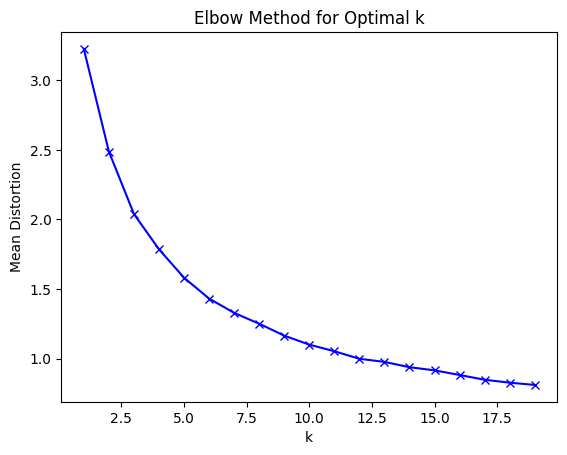

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
K = range(1,20)
meandistortions = []
for k in K:
  reduce_data = PCA(n_components=2).fit_transform(data)
  kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(reduce_data)
  meandistortions.append(sum(np.min(cdist(reduce_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / reduce_data.shape[0])
plt.xlabel('k')
plt.ylabel('Mean Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()